### Firstly import all the libraries needed for this project

1. **pyodbc** - *Library through which we can connect to the AdventureWorks database*
2. **pandas** - *To be able to store the relevant tables as a dataframe for data cleaning , manipulation and analysis*
3. **matplotlib** - *Plotting library used for data visualisations*
4. **seaborn** - *Another data visualisation library , built on top of matplotlib and used in cojunction with it*

In [170]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#### Now we will use pydobc to connect to Adventure works using a connection string. Once a connection has been established , write a query to view the table in question , which in this case is *Sales.Store* . Final step is to load this table into a pandas dataframe by using *pd.read_sql(query, connection_str)*

In [171]:
# Credentials to connect to AdventureWorks database
SERVER = 'DESKTOP-PRO450G'
DATABASE = 'AdventureWorks'

# Connection string, that will be used to connect to db
connectionString = f'DRIVER={{SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trust_Connection=yes'
conn = pyodbc.connect(connectionString)

query = 'SELECT * FROM Sales.Store' # Selects the entire table 
sales_store = pd.read_sql(query, conn) # Loads that said table in a pandas dataframe

C:\Users\User\AppData\Local\Temp\ipykernel_18216\4145160981.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_store = pd.read_sql(query, conn) # Loads that said table in a pandas dataframe


#### Explore the data , check the shape , wether there are null values present , data types

In [172]:
# Check how many rows and columns there are
sales_store.shape

(701, 6)

In [173]:
# Check for null_values 
sales_store.isna().sum()

BusinessEntityID    0
Name                0
SalesPersonID       0
Demographics        0
rowguid             0
ModifiedDate        0
dtype: int64

In [174]:
# Check data types of columns
sales_store.dtypes

BusinessEntityID             int64
Name                        object
SalesPersonID                int64
Demographics                object
rowguid                     object
ModifiedDate        datetime64[ns]
dtype: object

#### Working in conjunction with SSMS , identified that the data in question is stored in a xml file in the *Demographics* column , there is however a view stored as *Sales.vStoreWithDemographics* that contains all the parsed information from that xml file in a table. I will load in that view as a dataframe using pandas .read_sql method

In [175]:
dataframe = pd.read_sql('SELECT * FROM Sales.vStoreWithDemographics', conn)
conn.close()

C:\Users\User\AppData\Local\Temp\ipykernel_18216\3941876530.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = pd.read_sql('SELECT * FROM Sales.vStoreWithDemographics', conn)


In [176]:
dataframe.head()

,BusinessEntityID,Name,AnnualSales,AnnualRevenue,BankName,BusinessType,YearOpened,Specialty,SquareFeet,Brands,Internet,NumberEmployees
0,328,Purchase Mart,1500000.0,150000.0,United Security,OS,1992,Touring,38000,3,ISDN,49
1,330,Major Sport Suppliers,3000000.0,300000.0,Reserve Security,OS,1998,Mountain,68000,3,DSL,52
2,332,Family's Favorite Bike Shop,800000.0,80000.0,Primary International,BM,1997,Mountain,21000,3,ISDN,18
3,334,Global Plaza,800000.0,80000.0,Reserve Security,BM,1975,Mountain,19000,3,DSL,19
4,336,Imported and Domestic Cycles,1000000.0,100000.0,United Security,BM,2000,Road,24000,2,T1,20


In [177]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BusinessEntityID  701 non-null    int64  
 1   Name              701 non-null    object 
 2   AnnualSales       701 non-null    float64
 3   AnnualRevenue     701 non-null    float64
 4   BankName          701 non-null    object 
 5   BusinessType      701 non-null    object 
 6   YearOpened        701 non-null    int64  
 7   Specialty         701 non-null    object 
 8   SquareFeet        701 non-null    int64  
 9   Brands            701 non-null    object 
 10  Internet          701 non-null    object 
 11  NumberEmployees   701 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 65.8+ KB


In [178]:
dataframe['AnnualRevenue'] = dataframe['AnnualRevenue'].astype(int)

------------------------------------------------------------------------------------------------------------------------------------------------------------

## Check the distribution of Store size, Annual Revenue and Number of employees, to get that i am going to visualise it using violin plots from the sns module 

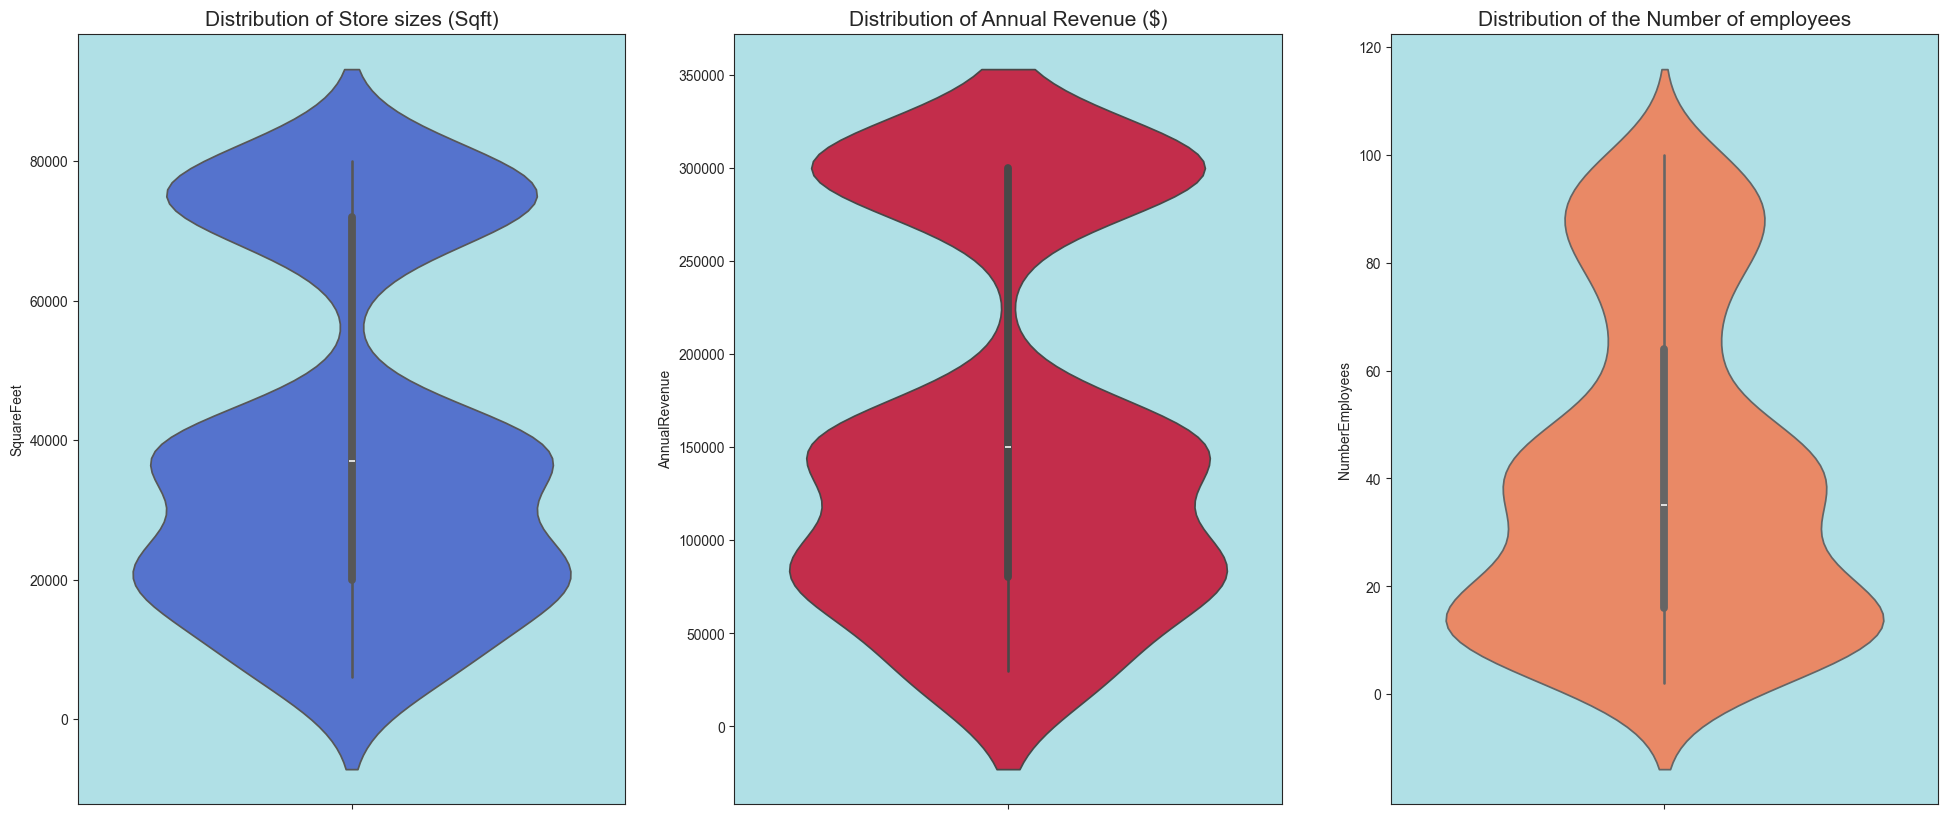

In [179]:
fig, axes = plt.subplots(1, 3, figsize=(24, 10))

sns.violinplot(dataframe.SquareFeet, color='royalblue', ax=axes[0])
axes[0].set_title('Distribution of Store sizes (Sqft)', fontsize=15)

sns.violinplot(dataframe.AnnualRevenue, color='crimson', ax=axes[1])
axes[1].set_title('Distribution of Annual Revenue ($)', fontsize=15)

sns.violinplot(dataframe.NumberEmployees, color='coral', ax=axes[2])
axes[2].set_title('Distribution of the Number of employees', fontsize=15)
axes[2].set_yticks([0, 20, 40, 60, 80, 100, 120])

plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------

## Identify relationships with Annual revenue, Store size, and number of employees

In [180]:
# Created a seperate dataframe to identify relationships in
rel = dataframe[['SquareFeet','AnnualRevenue','NumberEmployees']].corr()

## Correlation Matrix
Will help to identify the relationship between Revenue , Size, and number of employees:
-   1 indicates a positive correlation 
-   -1 indicates a negative correlation
-   0 indicates no correlation

in this instance i will use a heatmap ( *sns.heatmap()* ) to visualise the correlation between those variables

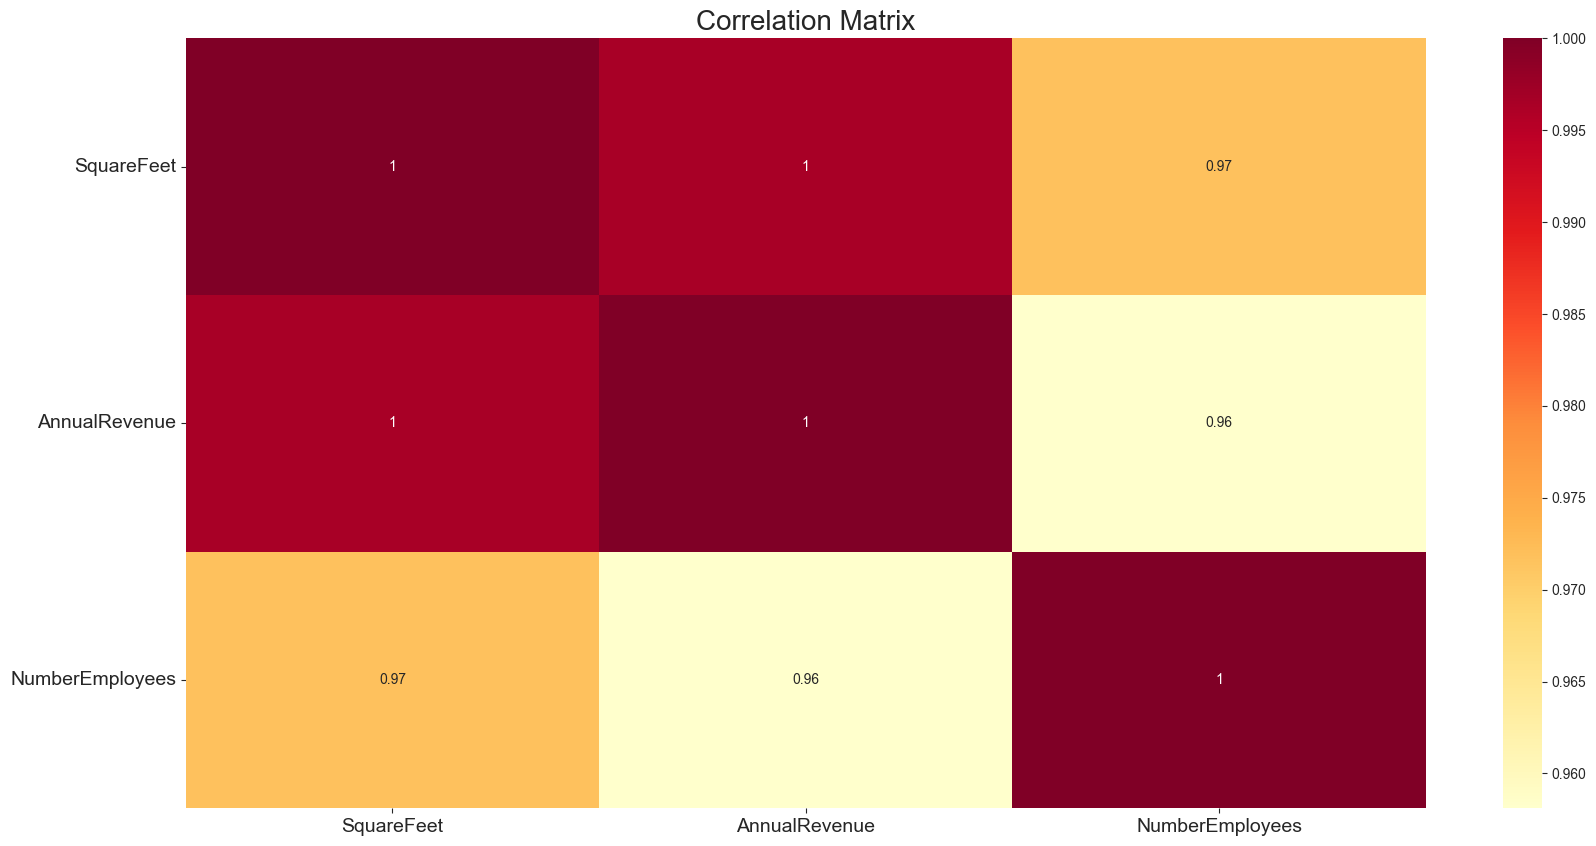

In [181]:
sns.set_style('ticks', rc={'axes.facecolor':'powderblue'})
plt.figure(figsize=(20,10))
sns.heatmap(rel, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

As per the heatmap , we can clearly see that Store size has a positive correlation with Annual revenue as well as Number of employees. What does that mean ?
- As the store size increases the annual revenue will increase
- As the store size increases the number of employees in the store also increases

------------------------------------------------------------------------------------------------------------------------------------------------------------

## Scatterplots

### Now i want to plot a series of scatterplots using *sns.scatterplot()* to visualise relationships with store size (SquareFeet), Total revenue (AnnualRevenue), Number of employees (NumberEmployees)

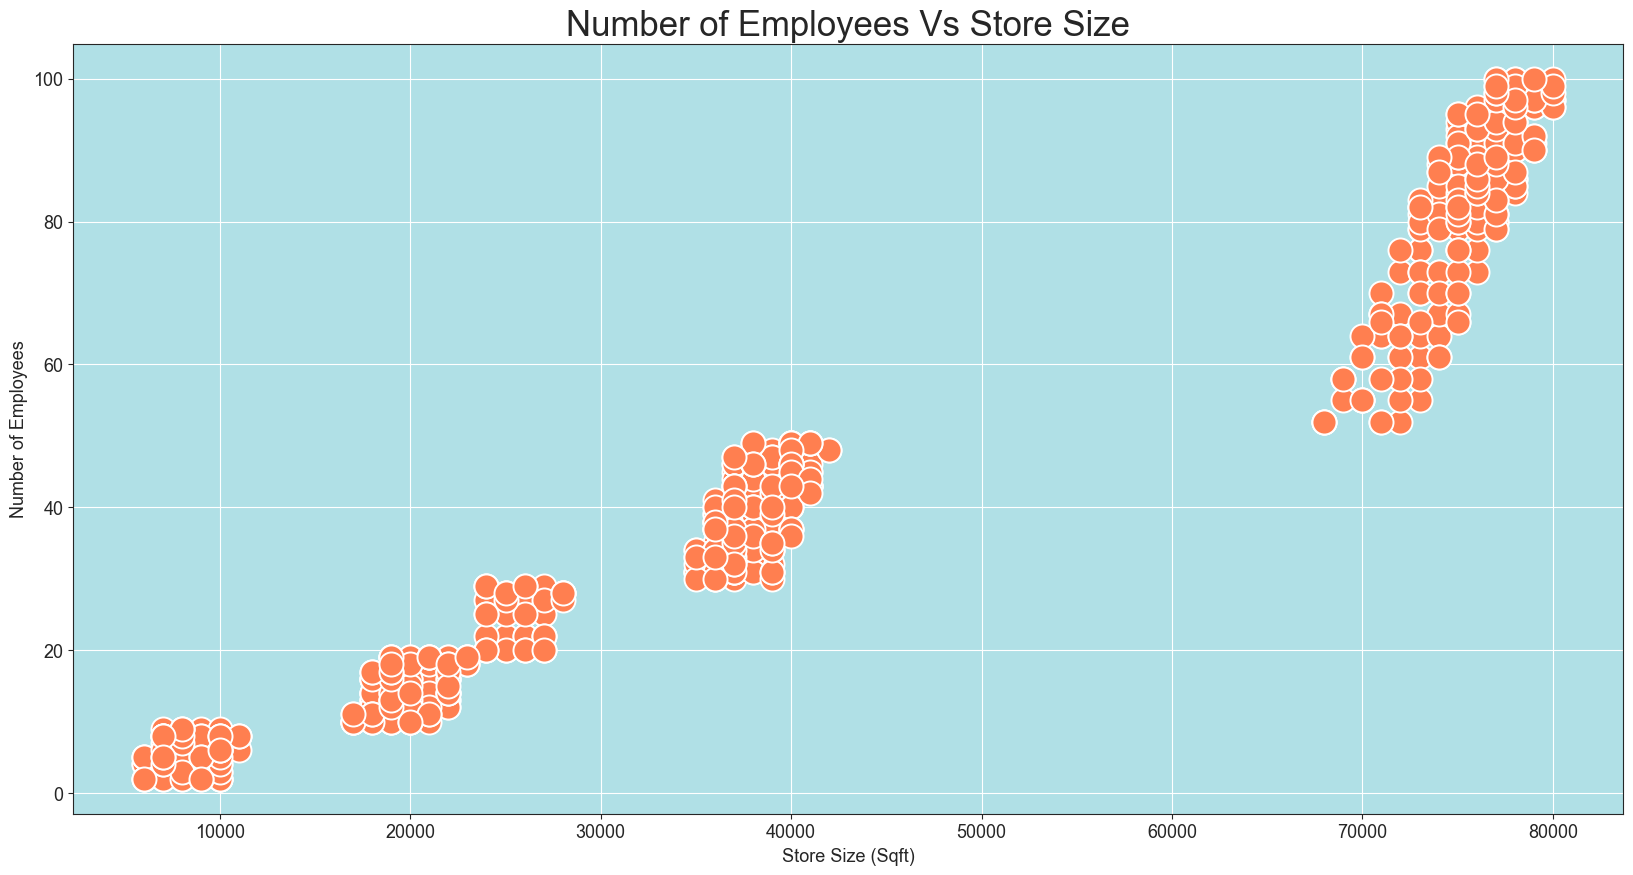

In [182]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataframe, x='SquareFeet', y='NumberEmployees', color='coral', s=300)
plt.title('Number of Employees Vs Store Size', fontsize=25)
plt.xlabel('Store Size (Sqft)', fontsize=13)
plt.ylabel('Number of Employees', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.grid(True, color='white')
plt.show()

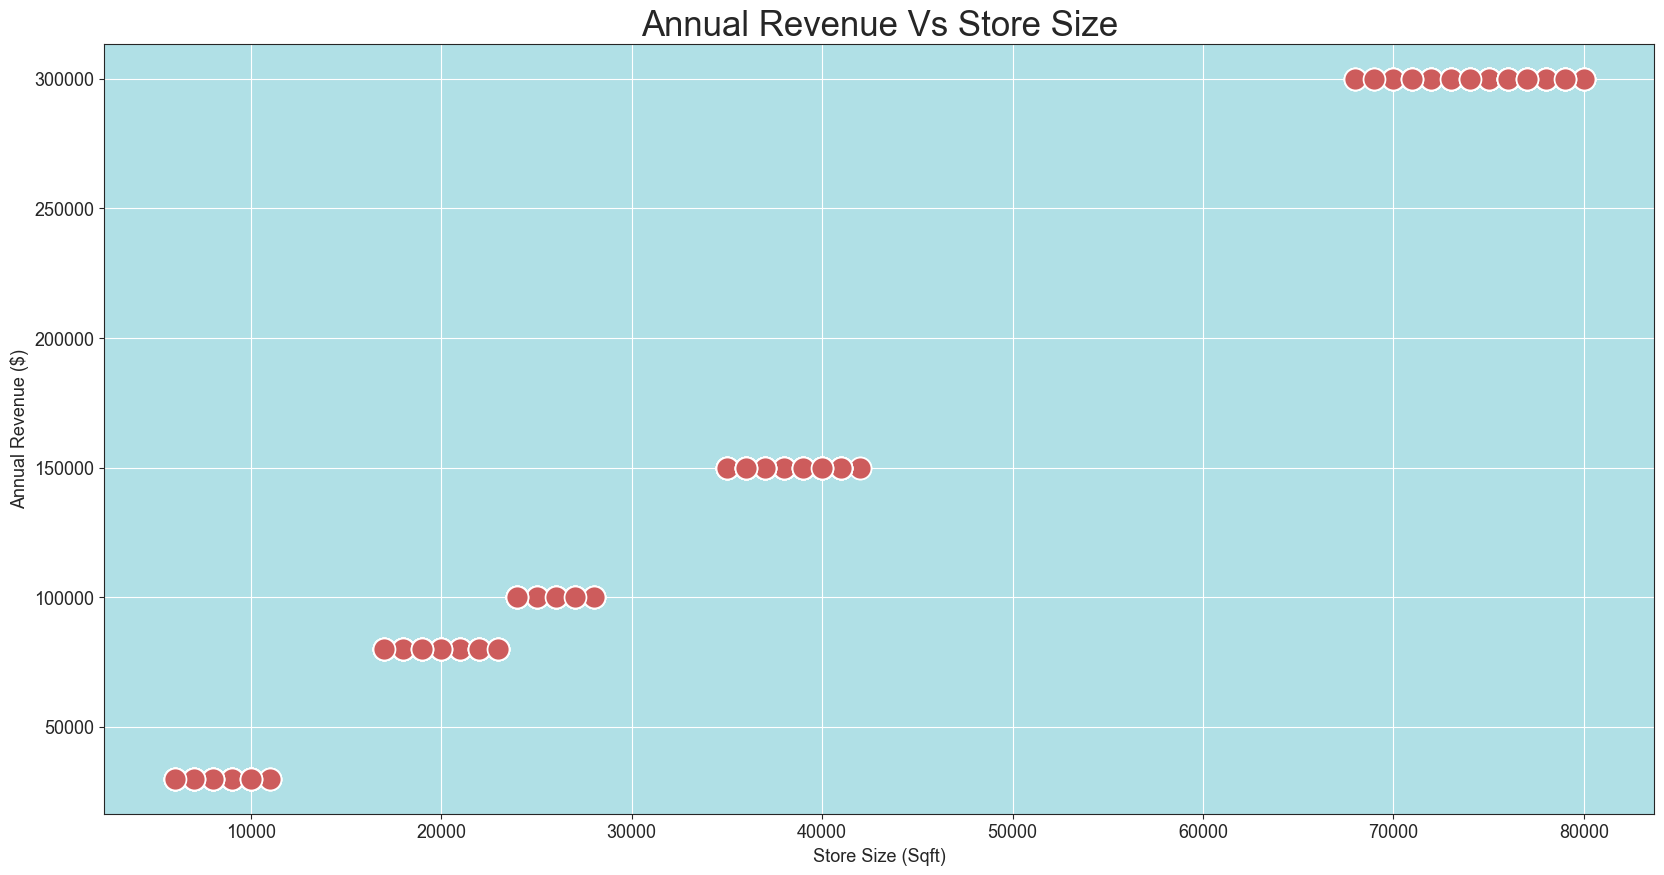

In [183]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataframe, x='SquareFeet', y='AnnualRevenue', color='indianred', s=250)
plt.title('Annual Revenue Vs Store Size', fontsize=25)
plt.xlabel('Store Size (Sqft)', fontsize=13)
plt.ylabel('Annual Revenue ($)', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, color='white')
plt.show()

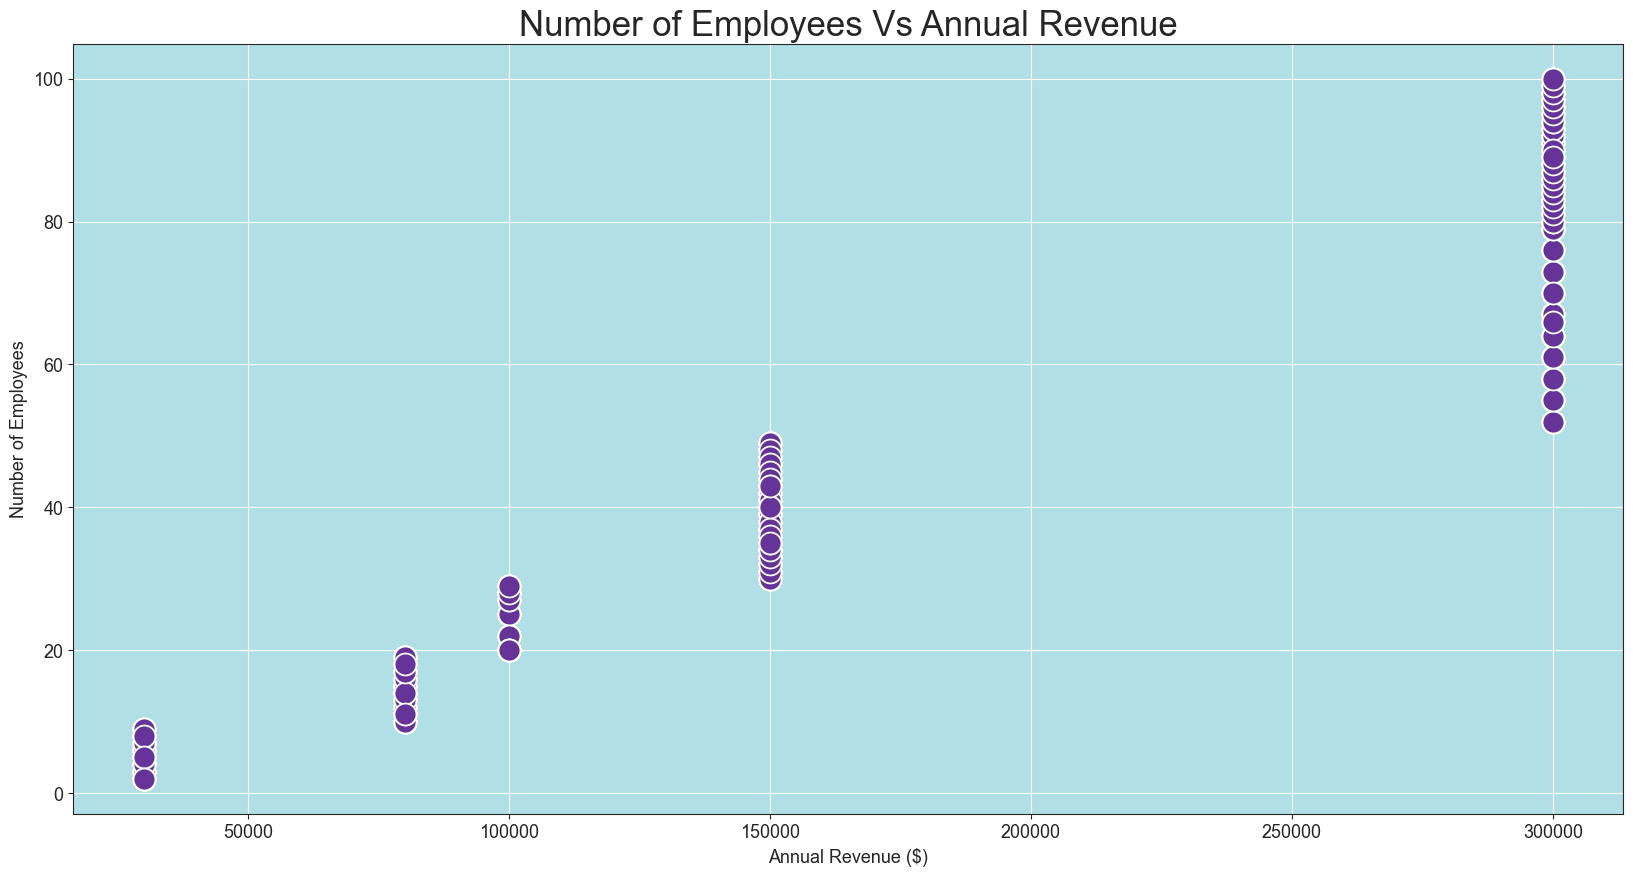

In [184]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataframe, x='AnnualRevenue', y='NumberEmployees', color='rebeccapurple', s=250)
plt.title('Number of Employees Vs Annual Revenue', fontsize=25)
plt.xlabel('Annual Revenue ($)', fontsize=13)
plt.ylabel('Number of Employees', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, color='white')
plt.show()

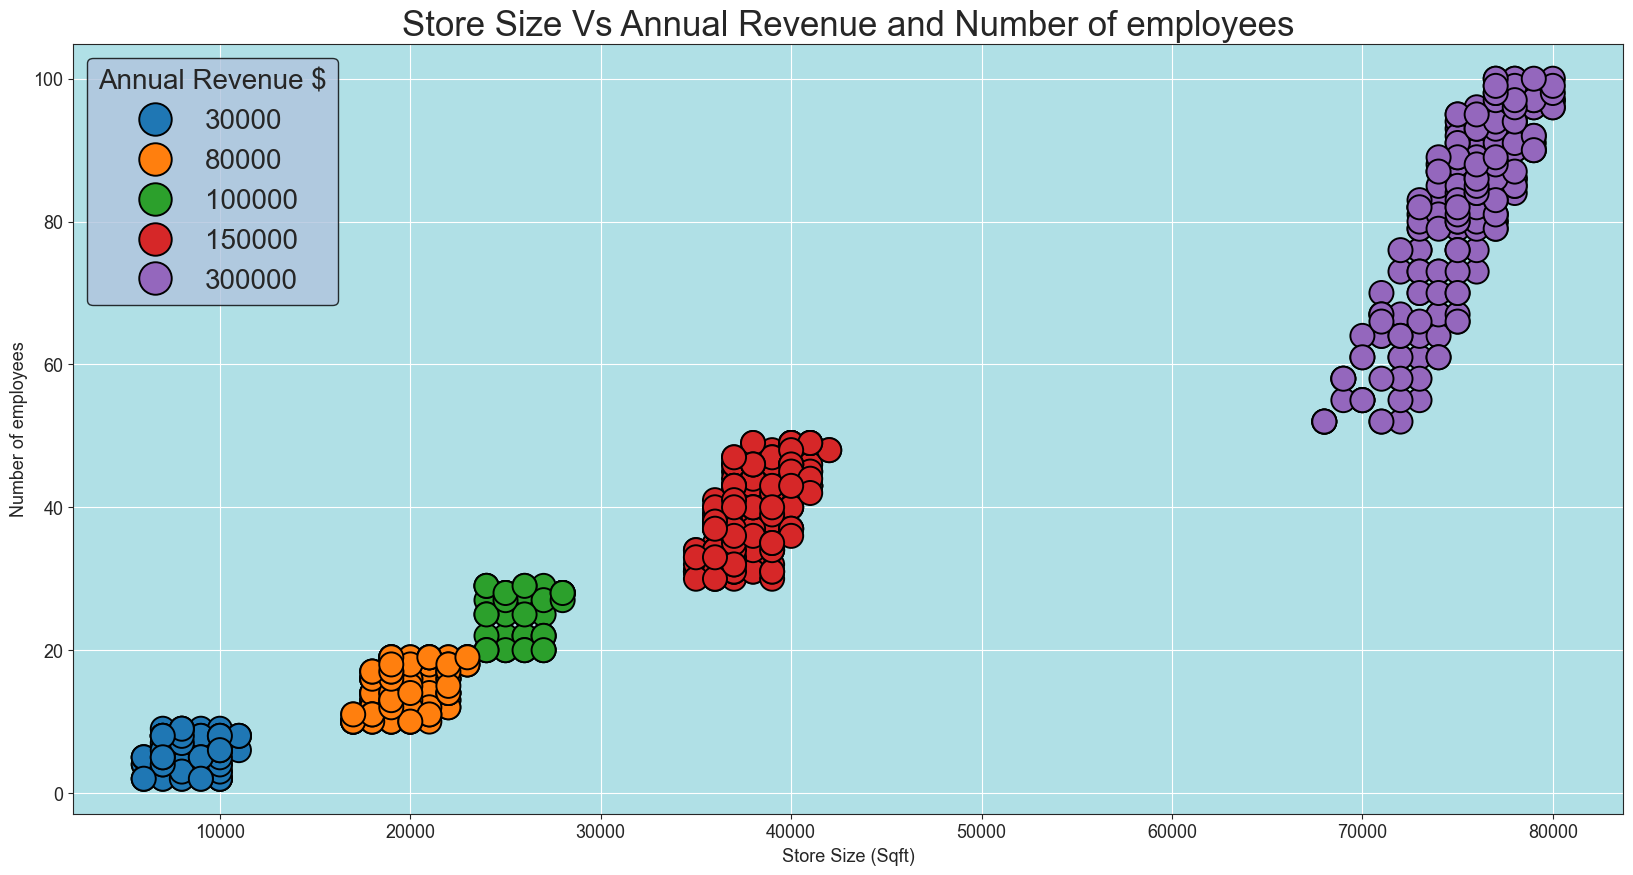

In [185]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataframe, x='SquareFeet', y='NumberEmployees', hue='AnnualRevenue', size='AnnualRevenue', sizes=(300,300),  palette='tab10', edgecolor='black')
plt.title('Store Size Vs Annual Revenue and Number of employees', fontsize=25)
plt.xlabel('Store Size (Sqft)', fontsize=13)
plt.ylabel('Number of employees', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Annual Revenue $', title_fontsize=20, markerscale=1.35, fancybox=True, frameon=True, edgecolor='black', facecolor='lightsteelblue', fontsize=20)
plt.grid(True, color='white')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------

## Additional charts

Gonna use a barchart to compare the store specialty types to variables like Annualrevenue, Store size and number of employees

In [186]:
df2 = dataframe.groupby('Specialty').agg({'AnnualRevenue': 'sum','NumberEmployees': 'sum','SquareFeet': 'sum'}).reset_index()

# Optionally, you can rename the columns if needed
df2 = df2.rename(columns={'AnnualRevenue': 'Total_Revenue', 'NumberEmployees': 'Total_Employees', 'SquareFeet': 'Total_Store_size'})

In [187]:
df2

,Specialty,Total_Revenue,Total_Employees,Total_Store_size
0,Mountain,40540000,10179,10175000
1,Road,46240000,11937,11704000
2,Touring,24310000,6281,6171000


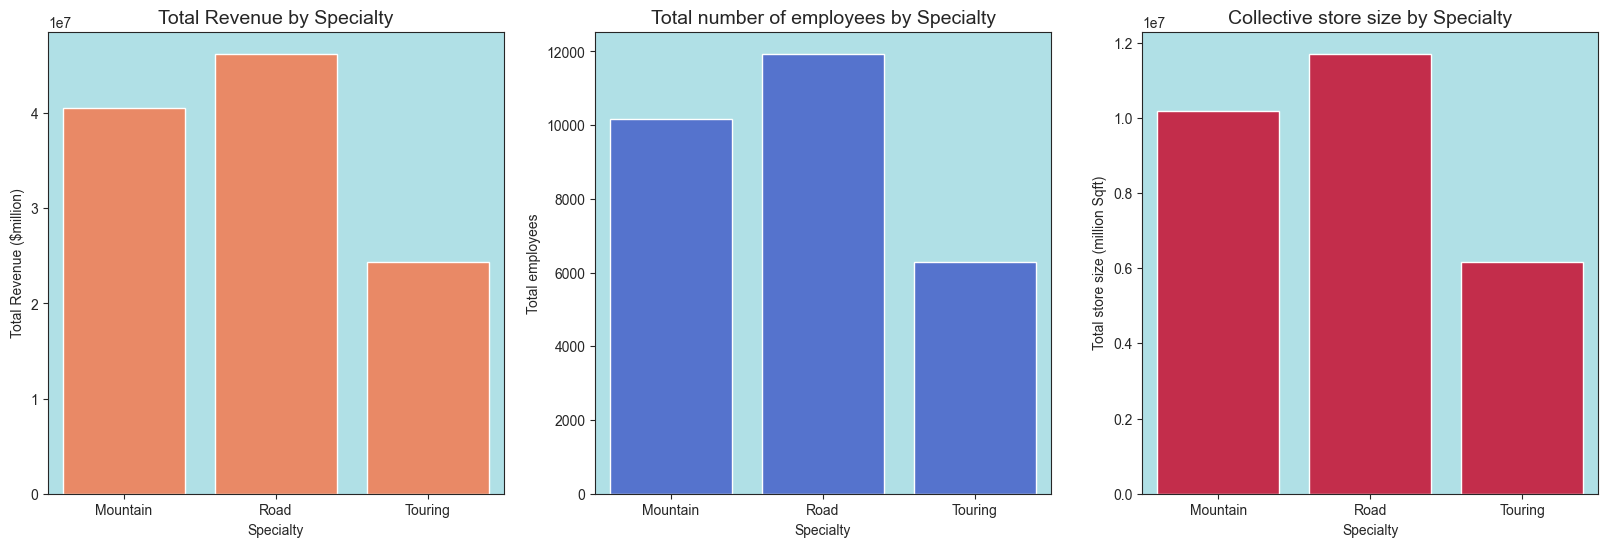

In [188]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
sns.barplot(data=df2, x='Specialty', y='Total_Revenue', color='coral', ax=axes[0])
axes[0].set_title('Total Revenue by Specialty', fontsize=14)
axes[0].set_ylabel('Total Revenue ($million)')

sns.barplot(data=df2, x='Specialty', y='Total_Employees', color='royalblue', ax=axes[1])
axes[1].set_title('Total number of employees by Specialty', fontsize=14)
axes[1].set_ylabel('Total employees')

sns.barplot(data=df2, x='Specialty', y='Total_Store_size', color='crimson', ax=axes[2])
axes[2].set_title('Collective store size by Specialty', fontsize=14)
axes[2].set_ylabel('Total store size (million Sqft)')

plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------

### Summary of steps undertaken to solve this question:
*What is the relationship between the size of stores, number of employees and revenue?*

Database used - AdventureWorks 

1. To solve this question , i firstly visited the `Sales.Store` table within the `AdventureWorks` database. I noticed that all the relevant information that i needed was stored in the `Demographics` column of the table.

2. Upon further exploration however , i noticed that individual demographic records were stored in an xml file. I had two options to be able to access the data that i needed: 
    1. to create a view that would seperate data from the `Demographics` column into a table and then analyse. 
    2. to parse the xml file for each record in python using the 'xml.etree.ElementTree' module.


3. After exploring the database, i found a view like my option (1) already existed, it was called `Store.vStoreWithDemographics`. It contained the data for store size, number of employees, and total revenue.

4. The next step was to load in the data in python, using `pydocb` to connect to the database , `pandas` to load the query and save the table as a dataframe, `matplotlib` and `seaborn` to visualise the data. 

------------------------------------------------------------------------------------------------------------------------------------------------------------

### Findings 

There is a strong positive correlation between **StoreSize and both NumberEmployees** `(r = 0.97)` and **AnnualRevenue** `(r = 0.99)`. This indicates that larger stores tend to employ more people and generate higher annual revenues, the bigger stores will generaly sell more products thus generating more revenue. Secondly, there is also a strong positive correlation between **NumberEmployees and AnnualRevenue** `(r = 0.96)`, suggesting that stores with more employees tend to generate higher annual revenues. This correlation reinforces the idea that employee count is a significant factor contributing to the financial performance of a store. Overall, the correlation matrix and scatter plots highlight the interdependence of these variables within the context of retail operations, emphasizing the importance of store size and employee count in determining annual revenue. 

The scatter plot results are in clustrers which signifies that store sizes have some limitations. Instead of stores having a wide variety of sizes, a lot of stores have similar sizes thus creating a cluster of points instead of having them spread out across all sizes.